# Sales Prediction Regression Model for Groceries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sweetviz as sv

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
print(os.getcwd())

c:\Users\admin\Desktop\Sales Prediction


In [3]:
sample_sales = pd.read_csv("C:/Users/admin/Desktop/Sales Prediction/data/sample_sales_data.csv", index_col=0)
sample_sales.shape

(7829, 9)

In [4]:
sample_sales.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [5]:
sensor_stock_levels = pd.read_csv("C:/Users/admin/Desktop/Sales Prediction/data/sensor_stock_levels.csv", index_col=0)
sensor_stock_levels.shape

(15000, 4)

In [6]:
sensor_stock_levels.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [7]:
sensor_storage_temperature = pd.read_csv("C:/Users/admin/Desktop/Sales Prediction/data/sensor_storage_temperature.csv", 
                                         index_col=0)
sensor_storage_temperature.shape

(23890, 3)

In [8]:
sensor_storage_temperature.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [9]:
sample_sales.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [10]:
sensor_stock_levels.describe()

,estimated_stock_pct
count,15000.000000
mean,0.502735
std,0.286842
min,0.010000
25%,0.260000
50%,0.500000
75%,0.750000
max,1.000000


In [11]:
sensor_storage_temperature.describe()

,temperature
count,23890.000000
mean,-0.207075
std,11.217649
min,-30.990000
25%,-2.860000
50%,-1.000000
75%,1.840000
max,34.990000


In [12]:
sample_sales.groupby('category').size().sort_values(ascending=False)

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
meat                     382
kitchen                  382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
frozen                   263
snacks                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
dtype: int64

In [13]:
sample_sales.groupby('customer_type').size().sort_values(ascending=False)

customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
dtype: int64

In [14]:
sample_sales.groupby('payment_type').size().sort_values(ascending=False)

payment_type
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
dtype: int64

In [15]:
sample_sales.groupby('product_id').size().sort_values(ascending=False)

product_id
ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Length: 300, dtype: int64

In [16]:
sensor_stock_levels.groupby('estimated_stock_pct').size().sort_values(ascending=False)

estimated_stock_pct
0.48    184
0.43    181
0.34    181
0.35    175
0.20    173
       ... 
0.11    126
0.53    126
0.28    125
0.73    125
0.45    123
Length: 100, dtype: int64

In [17]:
sensor_storage_temperature.groupby('temperature').size().sort_values(ascending=False)

temperature
 0.86     51
-1.65     49
-3.68     49
-3.49     48
-3.39     47
          ..
 21.42     1
 21.40     1
-23.83     1
 21.36     1
 34.99     1
Length: 3140, dtype: int64

In [18]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
    _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
    num_unique_values = len(data[column].unique())
    value_counts = data[column].value_counts()
    print(f"Column: {column} has {num_unique_values} unique values\n")
    print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
    _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


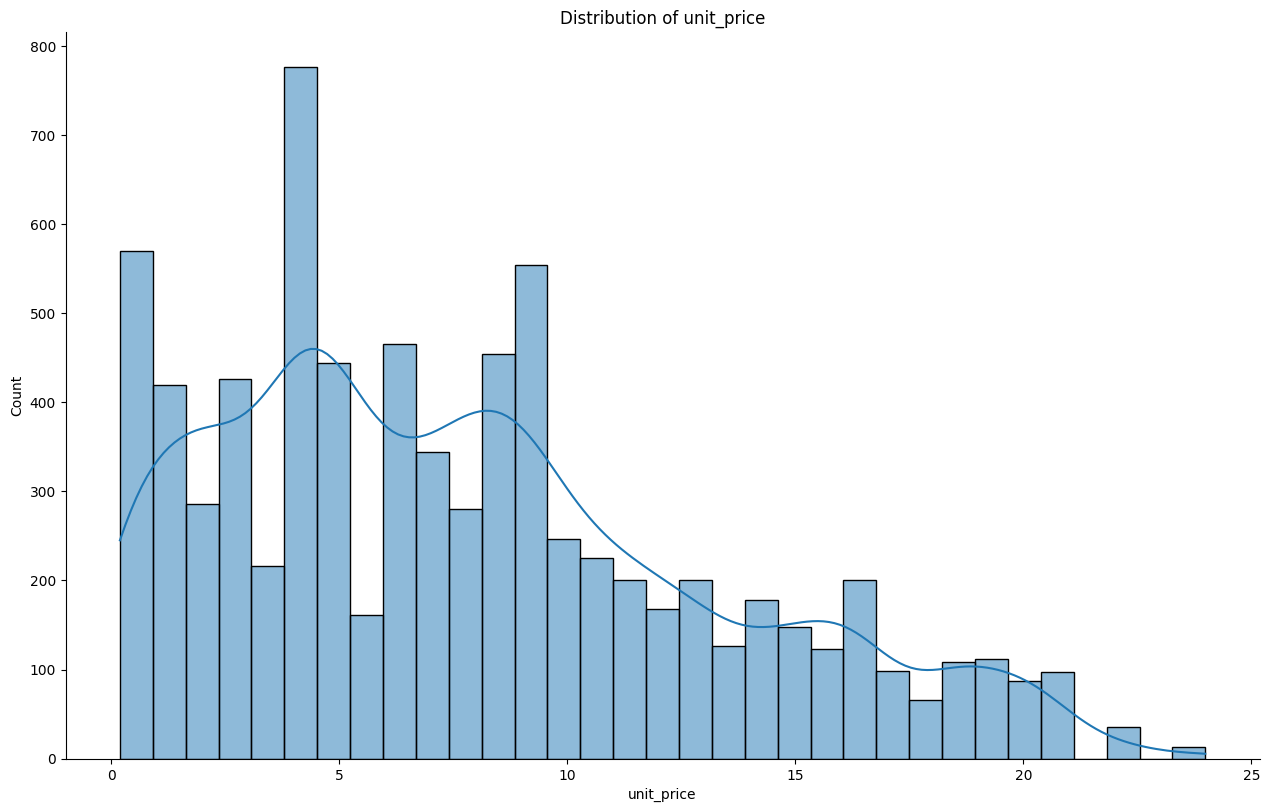

In [19]:
plot_continuous_distribution(sample_sales, 'unit_price')

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


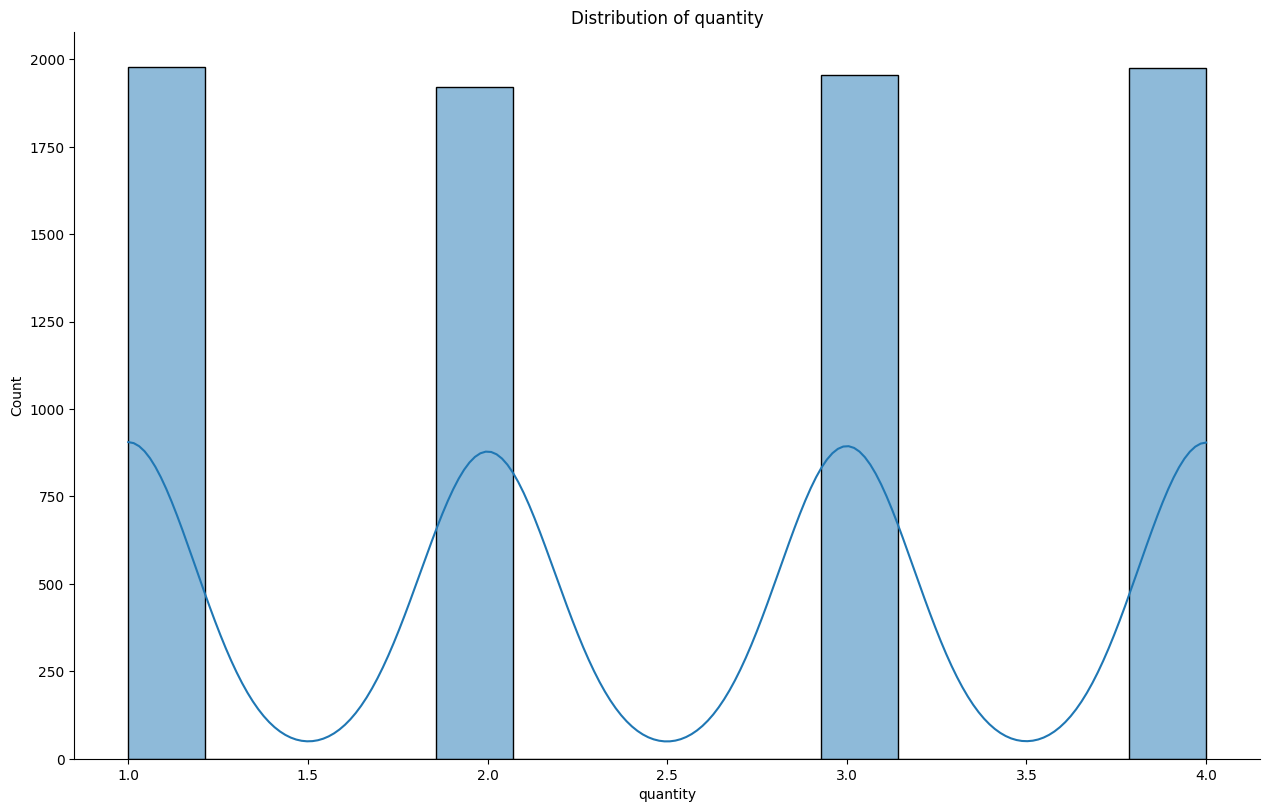

In [20]:
plot_continuous_distribution(sample_sales, 'quantity')

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


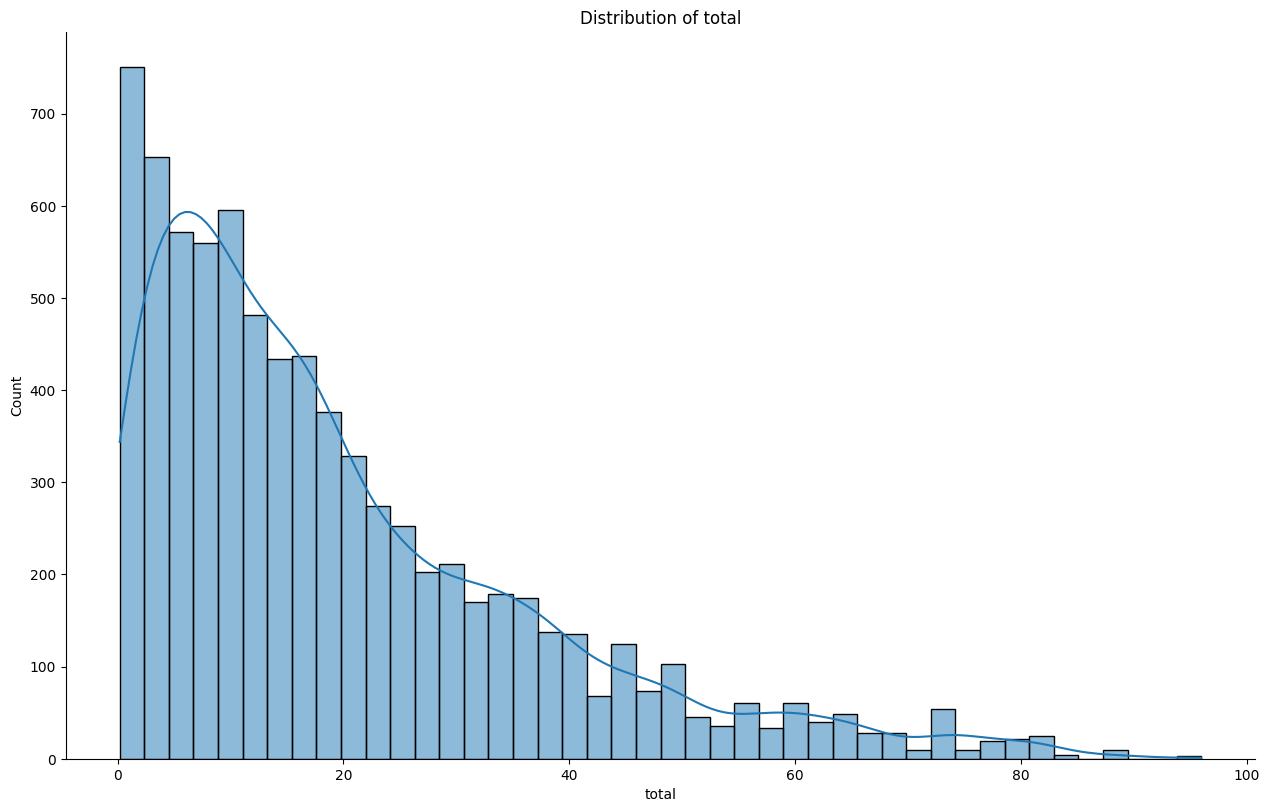

In [21]:
plot_continuous_distribution(sample_sales, 'total')

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


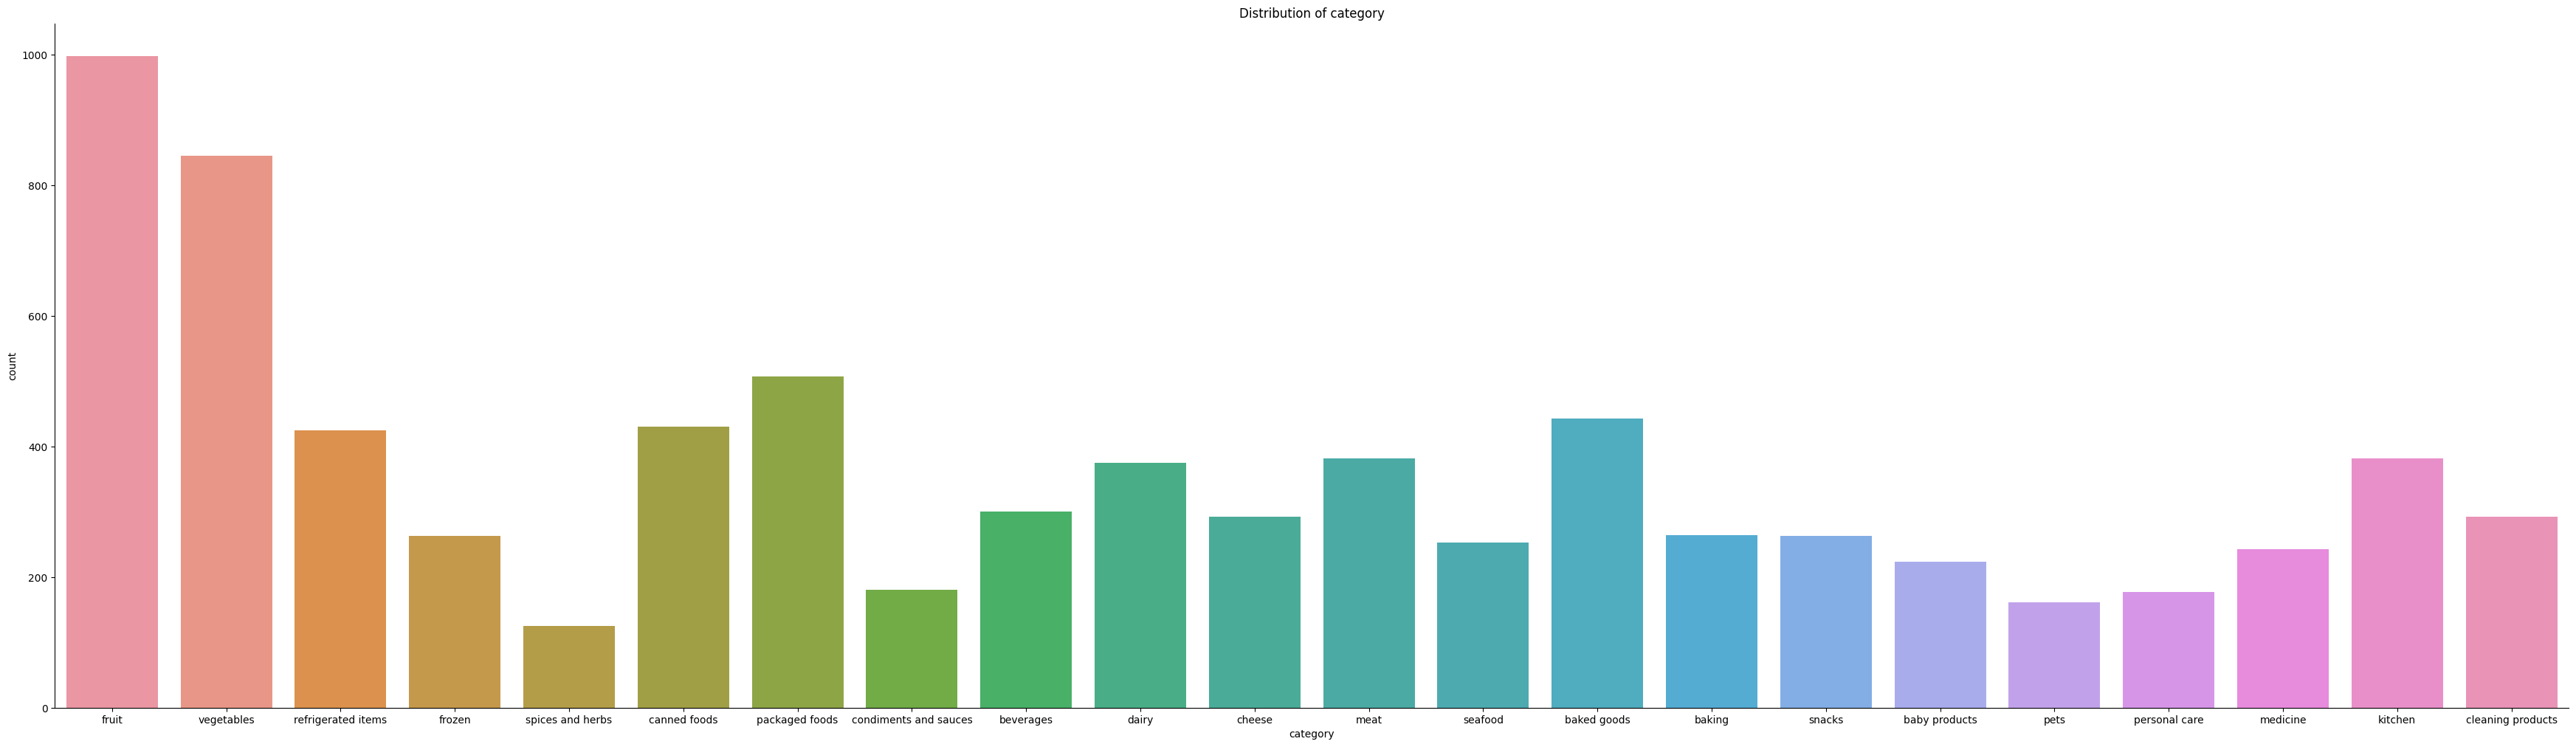

In [22]:
plot_categorical_distribution(sample_sales, 'category', height=10, aspect=3.5)

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


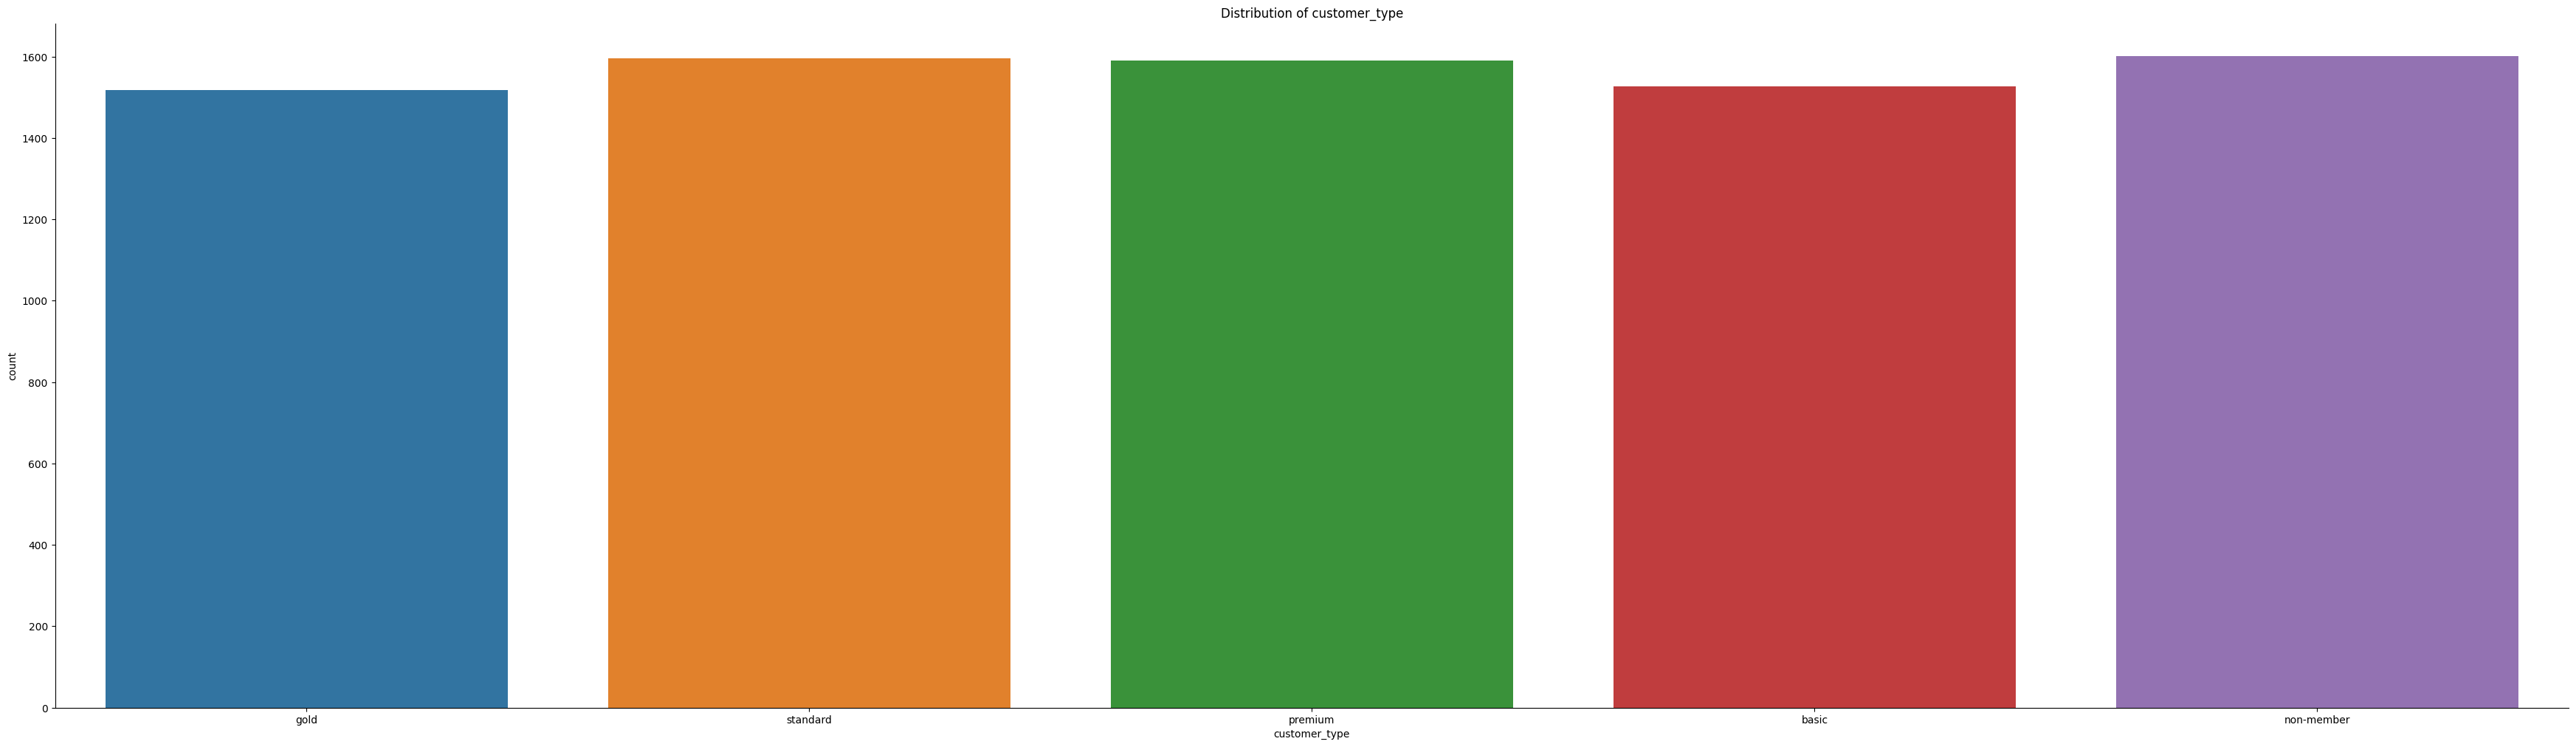

In [23]:
plot_categorical_distribution(sample_sales, 'customer_type', height=10, aspect=3.5)

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


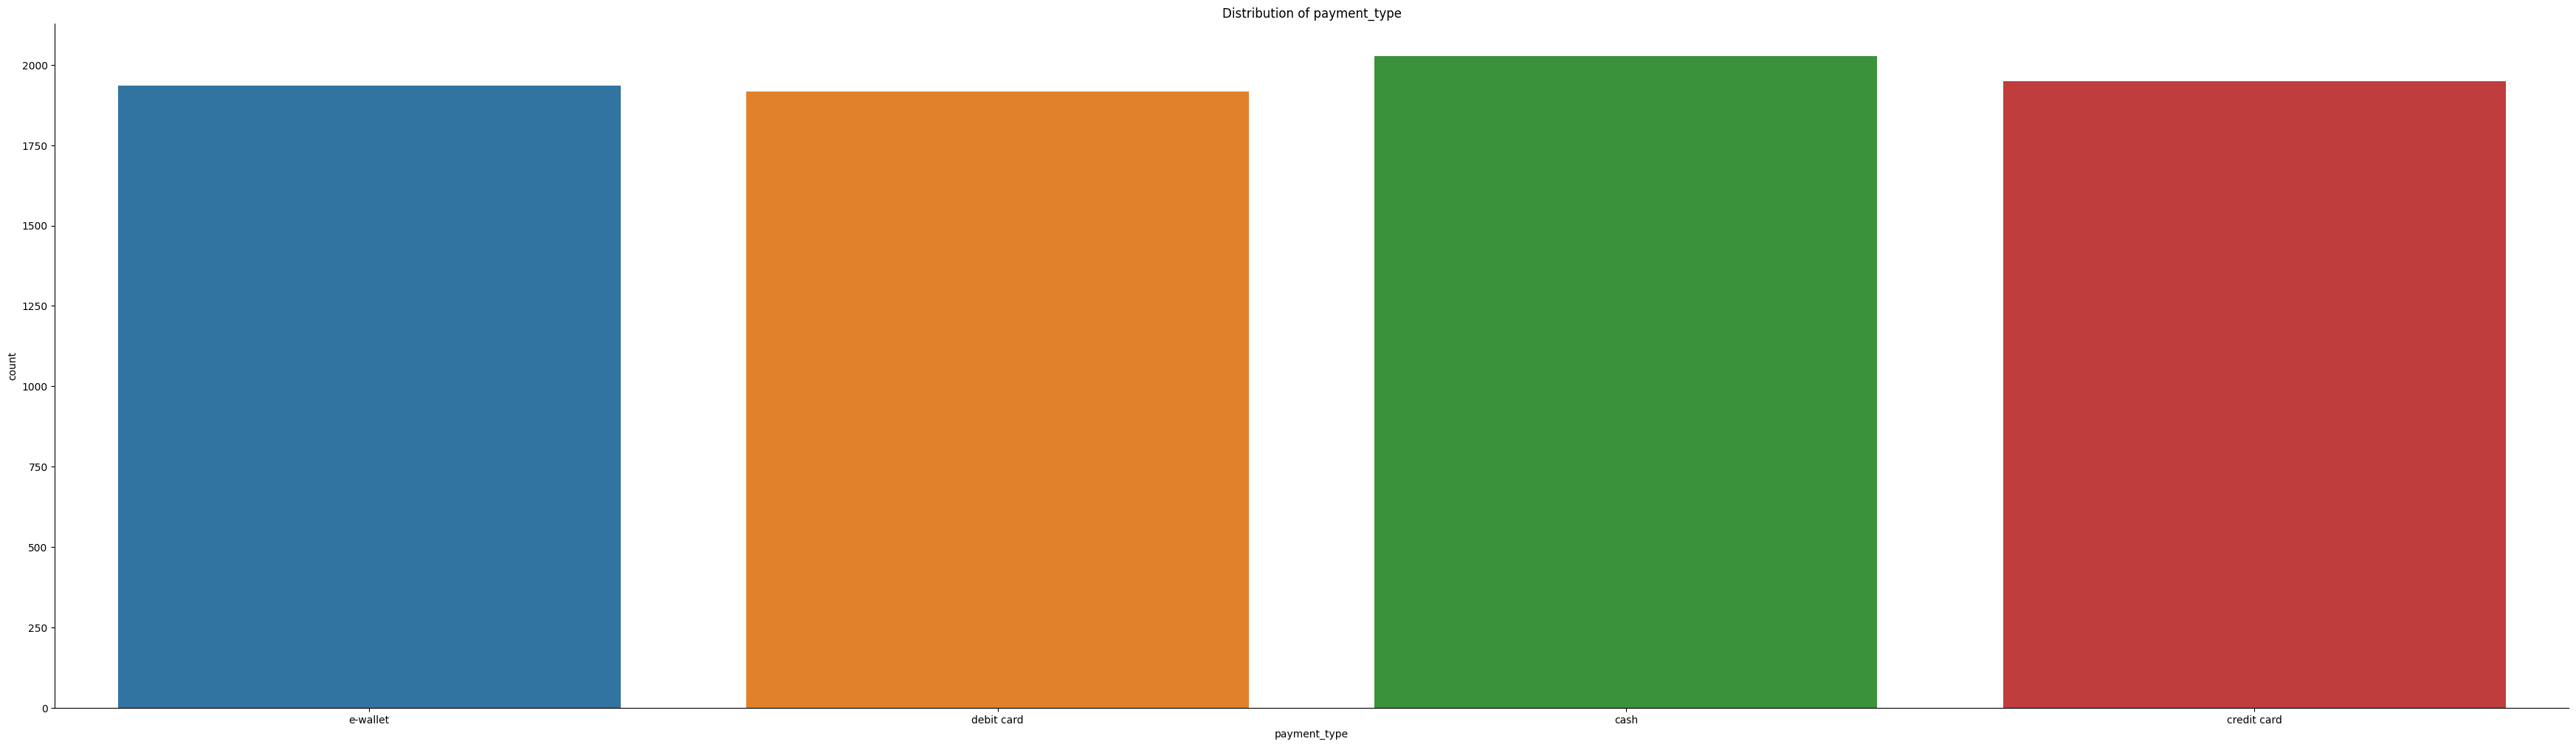

In [24]:
plot_categorical_distribution(sample_sales, 'payment_type', height=10, aspect=3.5)

In [25]:
get_unique_values(sample_sales, 'timestamp')

Column: timestamp has 7738 unique values

timestamp
2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: count, Length: 7738, dtype: int64


In [26]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):
    dummy = data.copy()
    dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
    return dummy

In [27]:
from datetime import datetime

def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
    dummy = data.copy()
    new_ts = dummy[column].tolist()
    new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
    new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
    dummy[column] = new_ts
    return dummy

In [28]:
sample_sales = convert_to_datetime(sample_sales, 'timestamp')
sample_sales = convert_timestamp_to_hourly(sample_sales, 'timestamp')

sensor_stock_levels = convert_to_datetime(sensor_stock_levels, 'timestamp')
sensor_stock_levels = convert_timestamp_to_hourly(sensor_stock_levels, 'timestamp')

sensor_storage_temperature = convert_to_datetime(sensor_storage_temperature, 'timestamp')
sensor_storage_temperature = convert_timestamp_to_hourly(sensor_storage_temperature, 'timestamp')

In [29]:
sample_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 869.7+ KB


In [30]:
sample_sales['hour'] = sample_sales['timestamp'].dt.hour
get_unique_values(sample_sales, 'hour')

Column: hour has 11 unique values

hour
11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: count, dtype: int64


In [31]:
sensor_stock_levels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 585.9+ KB


In [32]:
sensor_storage_temperature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 746.6+ KB


In [33]:
sensor_stock_levels.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [34]:
sensor_storage_temperature.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


In [35]:
sales_agg = sample_sales.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


In [36]:
stocks_agg = sensor_stock_levels.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'sum'}).reset_index()
stocks_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [37]:
temperature_agg = sensor_storage_temperature.groupby('timestamp').agg({'temperature': 'sum'}).reset_index()
temperature_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-9.03
1,2022-03-01 10:00:00,393.00
2,2022-03-01 11:00:00,-171.92
3,2022-03-01 12:00:00,-158.09
4,2022-03-01 13:00:00,-59.64


In [78]:
merged_df = stocks_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_df = merged_df.merge(temperature_agg, on=['timestamp'], how='left')
merged_df['quantity'] = merged_df['quantity'].fillna(0).astype('int')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3,-9.03
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3,-9.03
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0,-9.03
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0,-9.03
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0,-9.03


In [47]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  int32         
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(1)
memory usage: 381.4+ KB


In [79]:
product_categories = sample_sales[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

product_price = sample_sales[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

merged_df = merged_df.merge(product_categories, on="product_id", how="left")
merged_df = merged_df.merge(product_price, on="product_id", how="left")

merged_df['timestamp_day_of_month'] = merged_df['timestamp'].dt.day
merged_df['timestamp_day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['timestamp_hour'] = merged_df['timestamp'].dt.hour
merged_df.drop(columns=['timestamp'], inplace=True)

merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3,-9.03,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3,-9.03,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0,-9.03,baby products,14.19,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0,-9.03,beverages,20.19,1,1,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0,-9.03,pets,8.19,1,1,9


In [49]:
merged_df.columns

Index(['product_id', 'estimated_stock_pct', 'quantity', 'temperature',
       'category', 'unit_price', 'timestamp_day_of_month',
       'timestamp_day_of_week', 'timestamp_hour'],
      dtype='object')

In [80]:
merged_df.drop(columns=['product_id'], inplace=True)
merged_df.drop(columns=['category'], inplace=True)

X = merged_df.drop(columns=['estimated_stock_pct'])
y = merged_df['estimated_stock_pct']

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   estimated_stock_pct     10845 non-null  float64
 1   quantity                10845 non-null  int32  
 2   temperature             10845 non-null  float64
 3   unit_price              10845 non-null  float64
 4   timestamp_day_of_month  10845 non-null  int32  
 5   timestamp_day_of_week   10845 non-null  int32  
 6   timestamp_hour          10845 non-null  int32  
dtypes: float64(3), int32(4)
memory usage: 423.8 KB


In [82]:
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,0.89,3,-9.03,11.19,1,1,9
1,0.14,3,-9.03,1.49,1,1,9
2,0.67,0,-9.03,14.19,1,1,9
3,0.82,0,-9.03,20.19,1,1,9
4,0.05,0,-9.03,8.19,1,1,9


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size=0.75, random_state=42)

numerical_cols = [cname for cname in train_X.columns if train_X[cname].dtype in ['int64', 'float64', 'int32']]

numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
    ])

model = RandomForestRegressor(n_estimators=500, random_state=0)

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
my_pipeline.fit(train_X, train_y)

stocks_predictions = my_pipeline.predict(valid_X)

scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')

print(scores.mean())
print(mean_absolute_error(valid_y, stocks_predictions))

0.3757974999383894
0.3962942488768523


In [84]:
import pickle
with open('model_pickle.pkl', 'wb') as file:
    pickle.dump(my_pipeline, file)

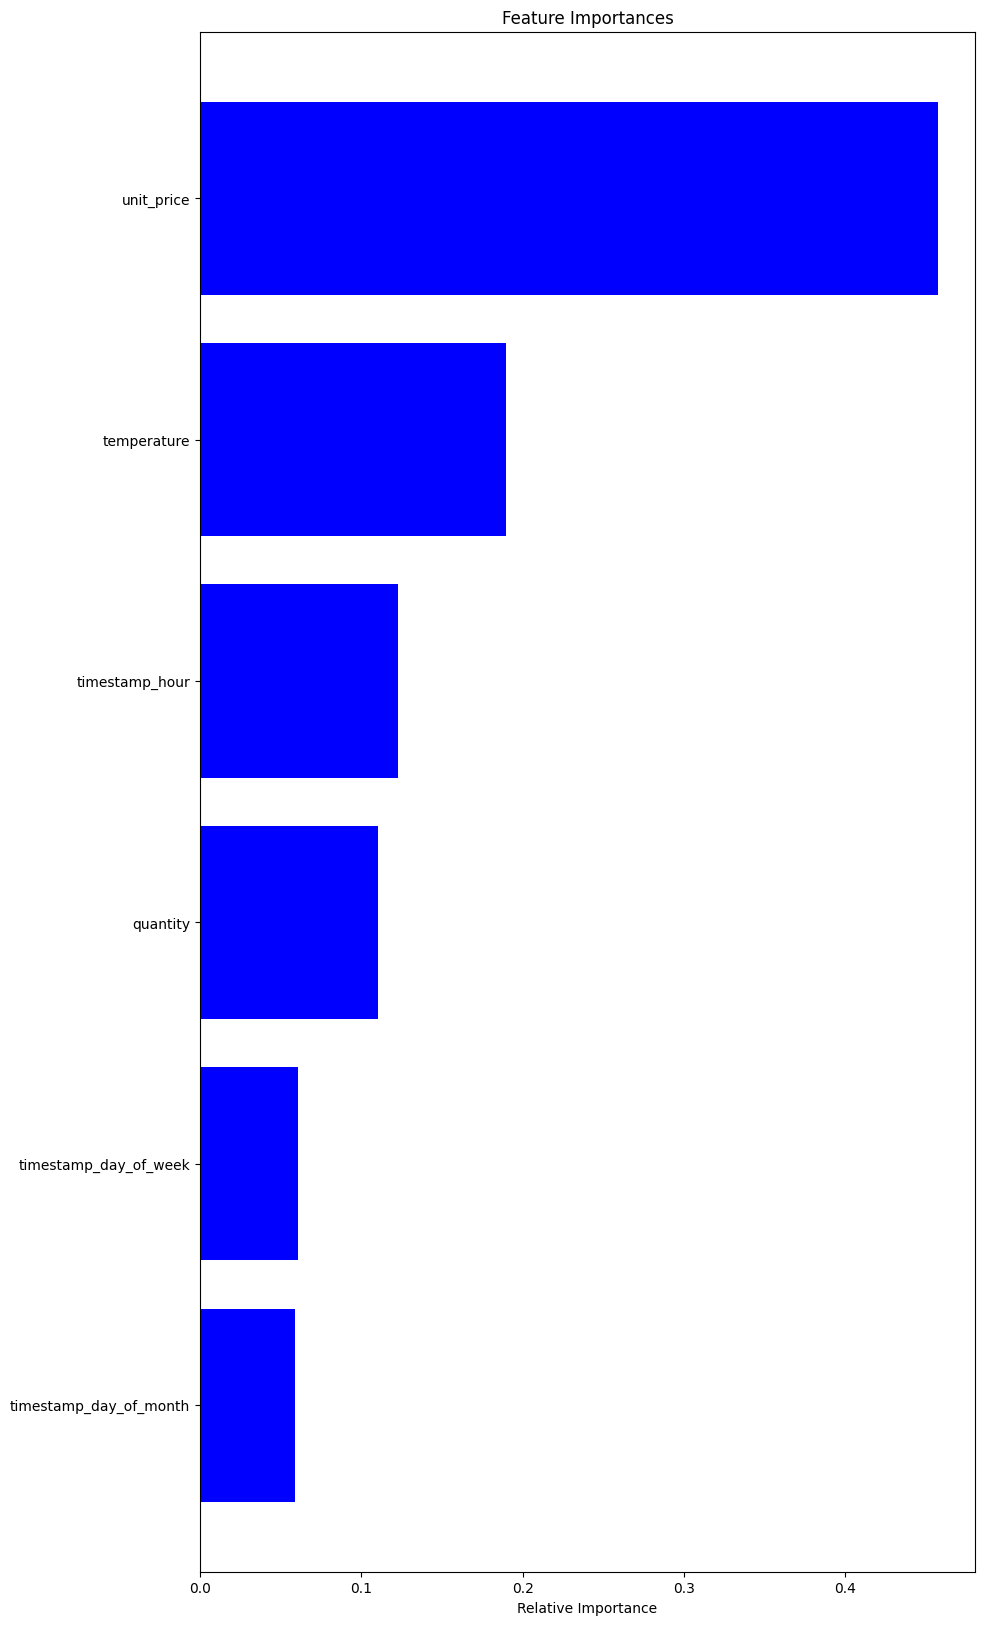

In [85]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [86]:
corr = merged_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
estimated_stock_pct,1.000000,0.035711,-0.010311,-0.006244,-0.013574,-0.009732,0.005776
quantity,0.035711,1.000000,-0.017040,-0.108101,-0.005037,-0.005017,0.010141
temperature,-0.010311,-0.017040,1.000000,0.002822,-0.039909,0.030943,0.050117
unit_price,-0.006244,-0.108101,0.002822,1.000000,-0.002841,-0.003186,-0.004508
timestamp_day_of_month,-0.013574,-0.005037,-0.039909,-0.002841,1.000000,0.234703,0.008650
timestamp_day_of_week,-0.009732,-0.005017,0.030943,-0.003186,0.234703,1.000000,-0.007717
timestamp_hour,0.005776,0.010141,0.050117,-0.004508,0.008650,-0.007717,1.000000


In [88]:
report = sv.analyze(merged_df)
report.show_html("sales_report.html")

AttributeError: 'DataFrame' object has no attribute 'iteritems'